# Dr. Semmelweis and the Discovery of Handwashing #

**Project Description**

In 1847, the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.
In this python project we will reanalyze the medical data Semmelweis collected. 

## 1. Meet Dr. Ignaz Semmelweis ##

Ignaz Semmelweis was a Hungarian physician who lived from 1818 to 1865. He is best known for his work on hand hygiene and the prevention of puerperal fever, also known as childbed fever. Semmelweis observed that the incidence of puerperal fever was significantly higher in women attended by doctors and medical students compared to those attended by midwives.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
yearly=pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths ##

The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [3]:
#making clinic 1 as 1 and Clinic 2 as 2 for clear analysis
yearly.loc[yearly['clinic'] == 'clinic 1', 'clinic'] = 1
yearly.loc[yearly['clinic'] == 'clinic 2', 'clinic'] = 2

# Calculate the proportion of deaths
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract rows from clinic 1 into yearly1
yearly1 =yearly[yearly['clinic'] == 1]

# Extract rows from clinic 2 into yearly2
yearly2 = yearly[yearly['clinic'] == 2]

#Printing Yearly1
print(yearly1)

   year  births  deaths clinic  proportion_deaths
0  1841    3036     237      1           0.078063
1  1842    3287     518      1           0.157591
2  1843    3060     274      1           0.089542
3  1844    3157     260      1           0.082357
4  1845    3492     241      1           0.069015
5  1846    4010     459      1           0.114464


## 3. Death at the clinics

If we now plot the proportion of deaths at both clinic 1 and clinic 2.

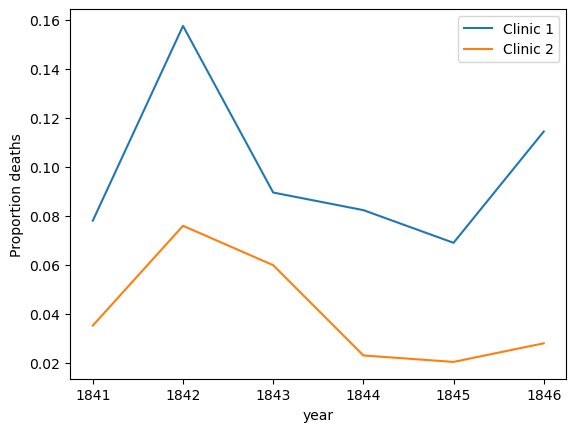

In [4]:
import matplotlib.pyplot as plt

# Plotting the data
ax = yearly1.plot(x='year', y='proportion_deaths', label='Clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)

# Customize the plot
ax.set_ylabel("Proportion deaths")

# Display the plot
plt.show()

We observed that death proportion is more in clinic 1 compared to clinic 2.Let;s find out what exactly is happening in clinic 1.
For that lets anaylze the monthly data for clinic 1.

## 4. The handwashing begins

Let's load the monthly data for clinic 1

In [5]:
monthly = pd.read_csv("datasets/monthly_deaths.csv",parse_dates=['date'])
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## 5. The effect of handwashing

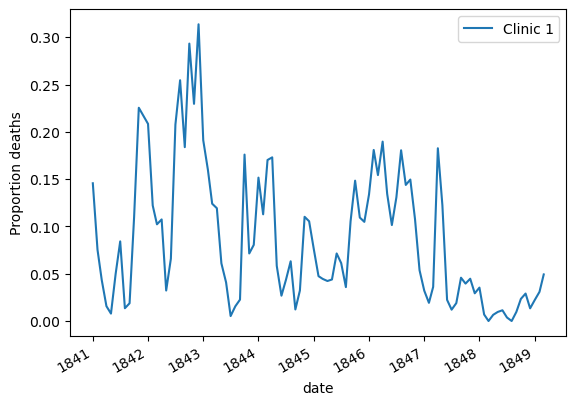

In [6]:
# Plotting the data
ax = monthly.plot(x='date',y='proportion_deaths', label='Clinic 1')

# Customize the plot
ax.set_ylabel("Proportion deaths")

# Display the plot
plt.show()

We can observe the death proportion in clinic 1 decreasing over time.Let's figure out what exaclty happening

## 6. The effect of handwashing highlighted

Starting from the summer of 1847 the proportion of deaths is drastically reduced and this was when Semmelweis made handwashing obligatory.

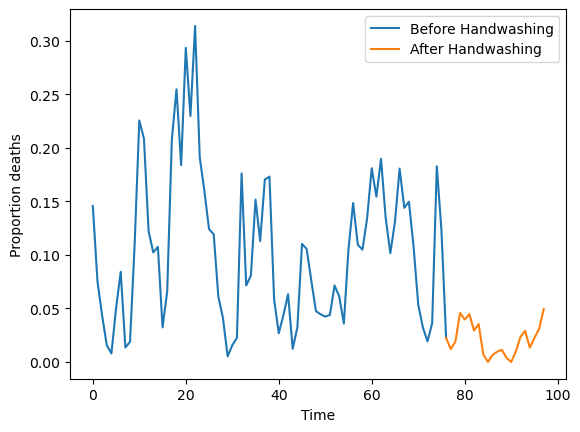

In [7]:
handwashing_start = pd.to_datetime("1847-06-01")

# Splitting the data into before and after handwashing periods
before_washing = monthly[monthly['date'] <= handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Create the plot
fig, ax = plt.subplots()
before_washing.plot(y='proportion_deaths', label='Before Handwashing', ax=ax)
after_washing.plot(y='proportion_deaths', label='After Handwashing', ax=ax)

# Customize the plot
ax.set_ylabel("Proportion deaths")
ax.set_xlabel("Time")

# Display the plot
plt.show()

We can see in the graph that handwashing started aroud 1947 april 1. From there we can observe huge change

## 7. More handwashing, fewer deaths?

The graph shows that handwashing had a huge effect. Let's see how much did it reduce the monthly proportion of deaths on average.

In [8]:
# Select the 'proportion_deaths' column from before_washing and after_washing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

# Calculate the difference in mean monthly proportion of deaths
reduction_mean = after_proportion.mean() - before_proportion.mean()

# Print the average reduction
print("Average reduction in proportion of deaths due to handwashing: ", reduction_mean)

Average reduction in proportion of deaths due to handwashing:  -0.08288307604550094


## 8. A Bootstrap analysis of Semmelweis handwashing data

In [9]:
from numpy import percentile


# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

    
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

[-0.09978219 -0.06644094]


## 9. The fate of Dr. Semmelweis

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

In [39]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True